In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('/homes/fivanovic/Work/FOB_SH')
from FOB_SH_analysis_Filip import data_splitter

: 

In [2]:
def read_coupling_file(file_path):

    '''
    function that reads values from file into 1D array, each line in the file must have only 1 object for this 
    to work
    '''

    with open(file_path) as full_file:
        coupling_list = full_file.readlines()

        couplings = map(float, coupling_list)
        couplings = list(couplings)

        coupling_array = np.array(couplings)

    return coupling_array

In [3]:
def excitonic_coupling(coordinates_1, coordinates_2, charges_1, charges_2):

    V = 0
    charges_1 = charges_1/np.sqrt(2)
    charges_2 = charges_2/np.sqrt(2)

    for coord, charge in zip(coordinates_1,charges_1):
        for coord2, charge2 in zip(coordinates_2,charges_2):

            distance = np.sqrt(np.sum((coord - coord2)**2))
            distance = distance/0.529

            V_ij = (charge*charge2)/distance

            V = V + V_ij
    
    return V

In [4]:
PDI_lists = data_splitter('/scratch/fivanovic/X-SH/testing_debugging/POD_T6_PDI_TEST/run-fssh-FECT/PTCDIH_S1_TRESP_CHARGES-crys-camb3lyp_6-31Gdp.include',4)

PDI_charges = []
for element in PDI_lists:
    PDI_charges.append(float(element[-1]))

In [5]:
PDI_XSH_XT_coupling = read_coupling_file('/scratch/fivanovic/X-SH/testing_debugging/POD_T6_PDI_TEST/run-fssh-FECT/PDI_dimer_XSH_XT_couplings.xyz')
PDI_XSH_XT_coupling = PDI_XSH_XT_coupling*27200

In [6]:
dimer_geometry_path = '/scratch/fivanovic/X-SH/testing_debugging/POD_T6_PDI_TEST/run-fssh-FECT/PDI_dimer_geoms_1ps/'
dimer_geoms = [f'PDI_dimer-{num}.txt' for num in range(0,10000,100)]

python_XT_coupling = []

for word in dimer_geoms:
    full_path = dimer_geometry_path + word

    PDI_dimer_coords = data_splitter(full_path, 4)
    PDI_dimer_coords = [element[1:] for element in PDI_dimer_coords]

    PDI_dimer_coords = np.array(PDI_dimer_coords)

    vector_float = np.vectorize(float)
    PDI_dimer_coords = vector_float(PDI_dimer_coords)

    PDI_monomer_1 = PDI_dimer_coords[:40]
    PDI_monomer_2 = PDI_dimer_coords[40:]

    XT = excitonic_coupling(PDI_monomer_1, PDI_monomer_2, PDI_charges, PDI_charges)
    python_XT_coupling.append(XT)

python_XT_coupling = np.array(python_XT_coupling)*27200

Text(0, 0.5, 'Python Coupling /meV')

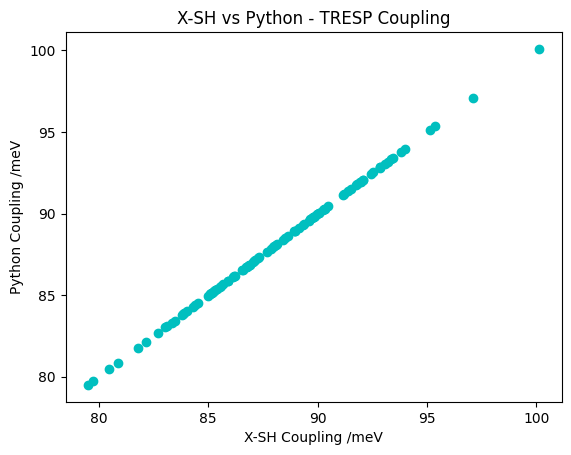

In [7]:
plt.scatter(PDI_XSH_XT_coupling, python_XT_coupling, color = 'c')
plt.title('X-SH vs Python - TRESP Coupling')
plt.xlabel('X-SH Coupling /meV')
plt.ylabel('Python Coupling /meV')